#Lab 1: Regression and Classification

Created for EIENDE9 - ECUE (Polytech Deep Learning course) by:

Gaetan Bahl - NXP Semiconductors - Vision TEC

gaetan.bahl@nxp.com / [LinkedIn](https://www.linkedin.com/in/gaetanbahl/)

## Introduction

In this lab, we will study the principles of regression and classification, which are the basic machine learning tasks.

This Lab assumes that you are familiar with the Python language. If you're not, please do Lab 0 first: https://colab.research.google.com/drive/16XlCqmmUQvwBD3D5u0lOy1rUFfDDZdYi

### Why use Google Colab and GPUs?

Google Colab is a collaborative workspace based on Jupyter Notebook, that lets you use a Python environment on Google Cloud with GPUs, for FREE!

GPUs (Graphical Processing Units) are powerful chips that let you train and use neural networks much faster than CPUs. Having access to a GPU is very important for Deep Learning, as it can often make training more than 100x faster. It might not seem that huge at first, but state of the art neural nets can take days to train on common datasets, even with multiple powerful GPUs. On CPUs, it would take **years**.

Colab gives you access to a free Nvidia Tesla K80, P4, T4 or P100 GPU, which cost from 1000€ to 6000€ with 24GB, 8GB, 16GB or 16GB of VRAM, respectively.

We will not use GPUs in this lab, but we will need them for the next ones.

![alt text](https://www.ushiji.online/assets/202005/20200524/Colab-PyTorch.jpg)


### Regression

Regression is the task of estimating the relationships between one or multiple predictor variables and a label. During this Lab, we will study linear regression.

![Visual example of linear regression](https://miro.medium.com/max/640/1*QiU6DcP_r9qWLznMw0-M_Q.png)

### Classification

Classification is a task where we estimate a category according to input variables. During this lab, we will study binary classification.

![Visual example of binary classification](https://i.stack.imgur.com/PvECs.png)




### Lesson plan

First, we will perform regression using the scikit-learn library.

Second, we will re-implement regression using Pytorch.

Finally, we will train our first neural network using Tensorflow Playground.



# Part 1: Using Linear regression in Scikit-learn

### Scikit-learn

This machine learning library for Python was originally created at Inria. It is a very popular tool in the ML community.

It contains tools for classification, regression, dimensionality reduction, datasets, etc.

You will need to refer to the documentation of this library during the lab: https://scikit-learn.org/stable/index.html

![Scikit learn and Python logos](https://blog.anybox.fr/content/images/2020/01/scikit-learn-1.png)

In [4]:
## Import scikit-learn and matplotlib

import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

## Q1: Loading the data

For regression, we will work with the diabetes dataset, which is a toy dataset included in Scikit-learn.

Start by loading the dataset. Refer to [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html?highlight=diabetes#sklearn.datasets.load_diabetes).

In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(return_X_y=False, as_frame=False, scaled=True)
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

## Q2: Taking a look at the data

This dataset features multiple variables and a regression target.

Plot the target variable against the BMI variable (column 2) using matplotlib.

In [6]:
X = diabetes.data[:, 2]
y = diabetes.target

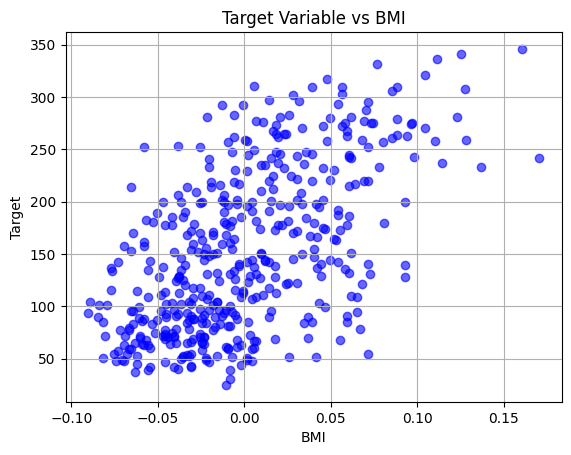

In [7]:
# Create a scatter plot of BMI vs target
plt.scatter(X, y, color='b', alpha=0.6)
plt.title('Target Variable vs BMI')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.grid(True)

# Show the plot
plt.show()

## Q3: Linear regression in Scikit-learn

Perform a linear regression using the [LinearRegression class from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) on the BMI variable.

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1, 1), y)
reg.score(X.reshape(-1, 1), y)

result = reg.predict(X.reshape(-1, 1))

## Q4: Plotting the result

Plot the result of the Linear regression.

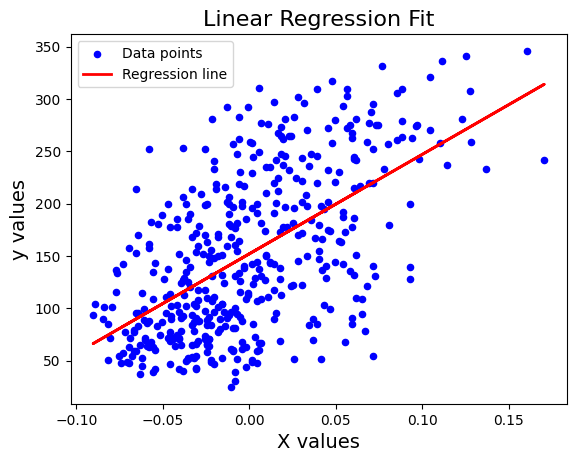

In [9]:
# Scatter plot with a vibrant color
plt.scatter(X, y, color='blue', label='Data points', s=20)

# Line plot with a different color
plt.plot(X, result, color='red', label='Regression line', linewidth=2)

# Adding a title and labels
plt.title("Linear Regression Fit", fontsize=16, color='black')
plt.xlabel("X values", fontsize=14, color='black')
plt.ylabel("y values", fontsize=14, color='black')

# Display a legend
plt.legend()

# Show the plot
plt.show()

## Q5: Displaying the parameters

Print the parameters (coefficient and intercept) of the Linear regression.

In [10]:
print(reg.coef_)
print(reg.intercept_)

[949.43526038]
152.13348416289617


# Part 2: Implementing Linear regression manually in PyTorch

## What's a framework and why are we using one (PyTorch)?

A programming framework is a collection of functions and utilities that is ready to use. Modern Deep Learning frameworks contain everything that is needed (layers, optimizers, losses, gradient computation...) to create and use neural networks, and make that really easy.

PyTorch, originally created by Facebook, is one of the most used frameworks, especially among researchers. The other most used framework are Tensorflow (created by Google) and Keras (an abstraction layer for multiple frameworks, including Tensorflow). PyTorch has gained a lot of popularity since its 1.0 release in 2018 and now surpassed Tensorflow.

PyTorch has now moved to the Pytorch foundation, under The Linux Foundation, which is a massive step for its adoption. https://ai.facebook.com/blog/pytorch-foundation/

![Pytorch logo](https://cdn.icon-icons.com/icons2/2699/PNG/512/pytorch_logo_icon_169823.png)

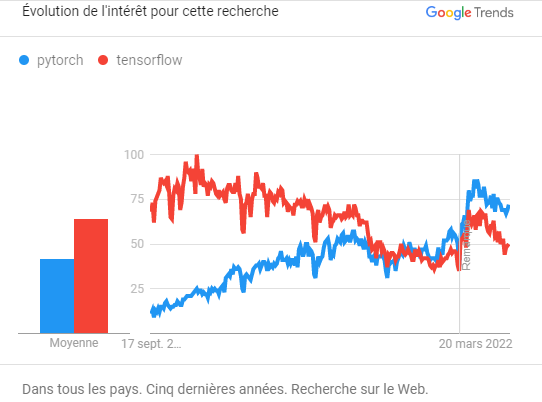

## Gradient Descent

Scikit-learn probably used Ordinary Least Squares to find the optimal parameters of the Linear Regression. However, Neural networks are most often trained using a variation of Gradient Descent.

In the next few questions, we will re-implement Linear Regression in PyTorch and train it using Gradient Descent.

![gradient descent](https://miro.medium.com/max/1024/1*G1v2WBigWmNzoMuKOYQV_g.png)

In [11]:
# import pytorch framework

import torch

# import other libs and load data again just to be sure :)
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from tqdm import tqdm_notebook as tqdm

X, y = sklearn.datasets.load_diabetes(return_X_y = True)

X_bmi = X[:, None, 2]

## Q6: Creating a layer

Neural network layers in Pytorch are contained in torch.nn.Module objects.

Instantiate a Linear layer for our Linear Regression. Keep in mind that our inputs and outputs have a single dimension.

You might need the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html).

In [12]:
linear_regression = torch.nn.Linear(1, 1, bias=True)
print(linear_regression)

Linear(in_features=1, out_features=1, bias=True)


## Q7: Layer parameters

Print the un-trained parameters of the layer (weight and bias).

In [13]:
linear_regression.weight

Parameter containing:
tensor([[-0.6590]], requires_grad=True)

In [14]:
linear_regression.bias

Parameter containing:
tensor([0.4531], requires_grad=True)

## Q8: Plotting the output of un-trained regression

Apply the un-trained regression to the diabetes data and plot the results.

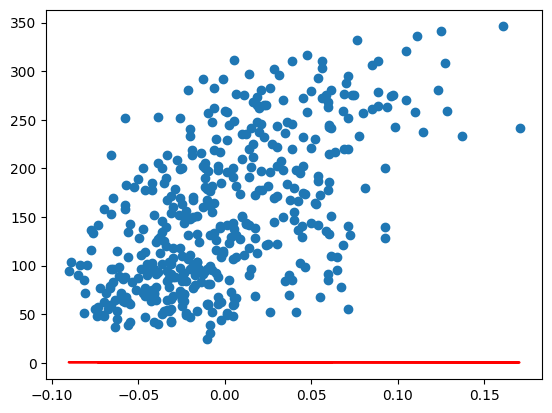

In [15]:
# we do not need to compute gradients yet
with torch.no_grad():

  plt.scatter(X_bmi, y)
  plt.plot(X_bmi, linear_regression(torch.tensor(X_bmi, dtype=torch.float)), color='red')
  plt.show()

## Q9: Loss function and optimizer

We want to train our regression using Mean Squared Error (MSE) as a loss using the Stochastic Gradient Descent (SGD) optimizer.

Create instances of MSE and SGD.

Documentation:
- Losses https://pytorch.org/docs/stable/nn.html#loss-functions
- Optimizers https://pytorch.org/docs/stable/optim.html

In [16]:
criterion = torch.nn.MSELoss()

In [17]:
optimizer = torch.optim.SGD(linear_regression.parameters(), lr=0.01)

## Basic training bricks

There are 4 steps to train the network on the dataset for a single iteration:



1.   Compute the forward pass

```
    y = net(x)
```


2.   Compute the loss


```
    loss = criterion(y, label)
```


3.   Reset the gradients


```
    optimizer.zero_grad()
```


4.   Compute the backward pass using automatic differentiation



```
     loss.backward()

```



5.   Apply one optimization step



```
     optimizer.step()

```





## Q10: Training loop

Put the steps shown above in a loop in order to perform a certain number of iterations.

In [18]:
N_ITERATIONS = 1000

X_tensor = torch.tensor(X_bmi, dtype=torch.float)

y_tensor = torch.tensor(y, dtype=torch.float)[:, None]

for i in tqdm(range(N_ITERATIONS)):

  y = linear_regression(X_tensor)

  loss = criterion(y, y_tensor)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  print(loss)


<ipython-input-18-8c83f9174f54>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(N_ITERATIONS)):


  0%|          | 0/1000 [00:00<?, ?it/s]

tensor(28939.6523, grad_fn=<MseLossBackward0>)
tensor(28028.3887, grad_fn=<MseLossBackward0>)
tensor(27153.2109, grad_fn=<MseLossBackward0>)
tensor(26312.6797, grad_fn=<MseLossBackward0>)
tensor(25505.4238, grad_fn=<MseLossBackward0>)
tensor(24730.1309, grad_fn=<MseLossBackward0>)
tensor(23985.5312, grad_fn=<MseLossBackward0>)
tensor(23270.4121, grad_fn=<MseLossBackward0>)
tensor(22583.6035, grad_fn=<MseLossBackward0>)
tensor(21923.9863, grad_fn=<MseLossBackward0>)
tensor(21290.4824, grad_fn=<MseLossBackward0>)
tensor(20682.0566, grad_fn=<MseLossBackward0>)
tensor(20097.7168, grad_fn=<MseLossBackward0>)
tensor(19536.5098, grad_fn=<MseLossBackward0>)
tensor(18997.5195, grad_fn=<MseLossBackward0>)
tensor(18479.8652, grad_fn=<MseLossBackward0>)
tensor(17982.7031, grad_fn=<MseLossBackward0>)
tensor(17505.2246, grad_fn=<MseLossBackward0>)
tensor(17046.6445, grad_fn=<MseLossBackward0>)
tensor(16606.2168, grad_fn=<MseLossBackward0>)
tensor(16183.2227, grad_fn=<MseLossBackward0>)
tensor(15776.

## Q11: Output of trained regression

Check that the regression is trained by printing the parameters again and plotting the result.

In [19]:
import matplotlib.pyplot as plt
print(linear_regression.weight)
print(linear_regression.bias)

Parameter containing:
tensor([[41.3745]], requires_grad=True)
Parameter containing:
tensor([152.1331], requires_grad=True)


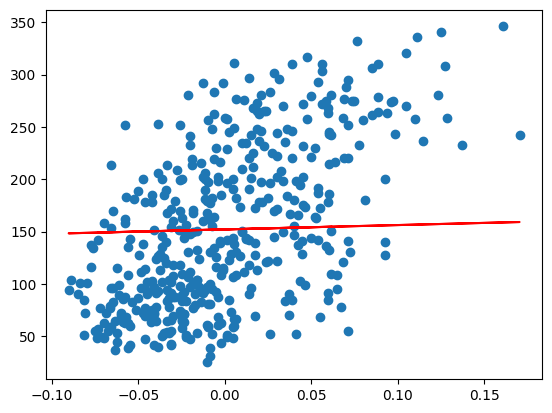

In [20]:
# we do not need to compute gradients here
with torch.no_grad():

  plt.scatter(X_bmi, y_tensor.numpy())
  plt.plot(X_bmi, linear_regression(torch.tensor(X_bmi, dtype=torch.float32)), color='red')

# Part 3: Playing around in Tensorflow playground

The tensorflow playground allows you to play with simple neural networks directly in your browser.

https://playground.tensorflow.org/

Explore the possibilities of this cool demo :)

# Part 4: Homework???

Things to do if you want:



* Keep playing in the TF Playground, understand all the settings (hyper-parameters)
* Try to implement classification in Scikit-learn and Pytorch
* Try to use more columns/dimensions of the input data

